<div style="text-align: left; background-color:black; font-family: Trebuchet MS; color:#A60505; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: black solid;"> Build A Custom Chatbot </div>

<center>
    <img src='https://wallpapercave.com/wp/wp10299458.jpg'>
</center>

 <a id="toc"></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="background-color:#B21010;font-family:sans-serif;color:#FFF9ED;font-size:150%;text-align:center;border-radius:9px 9px; padding: 15px; border-style: solid; border-color: black">TABLE OF CONTENTS</div>   
    
* [1. Introduction](#1)
    
* [2. Import Necessaries](#2)
    
* [3. EDA](#3)

    * [3.1. Load the data](#3.1)
    * [3.2. Extract Info from the Json data file and Store it in dataframe](#3.2)
    * [3.3. Check the shape of the dataset](#3.3)
    * [3.4. Display information about the dataset](#3.4)
    * [3.5. Display Number of Classes](#3.5)
    * [3.6. Check Number of Null Values](#3.6)
    * [3.7. Visualize the Null Values](#3.7)
    * [3.8. Visualize the distrbution of our Classes](#3.8)
    * [3.9 Display Word Cloud](#3.9)
    * [3.10 Distrbution of Number of letters in each text](#3.10)
    * [3.11 Distrbution of Number of words in each text](#3.11)
    * [3.12  Visualize Average word length in each text](#3.12)
    * [3.13 Visualize top words](#3.13)
    

* [4. Data Preprocessing](#4)

* [5. Split the data into train and test](#5)
     
    

* [6. Load BERT Pretrained model and Tokenizer](#6)

* [7. Transform the data into numerical format using the BERT Tokenizer](#7)
   
* [8. Build Data Loader](#8)

* [9. Define Evaluation Metrciesl](#9)

* [10. Define Training Arguments](#10)

* [11. Train the model](#11)

* [12. Evaluate the model](#12)

* [13. Save the model](#13)

* [14. Load the model](#14)

* [15. Chat with the Chatbot](#15)

* [16. AUTHOR MESSAGE](#16)



<a id="1"></a>
## <b>1 <span style='color:#B21010'>||</span> Introduction</b>


<div style="border-radius:10px;
            border: black solid;
            adding: 15px;
            background-color:#FBA7A7;
            font-size:120%;
            text-aling: left">
<h3 style:'border:0; border-radius: 15px; color: black'><center> How we will build the Chatbot?:</center></h3>

_________________________________________________________________________
    
Chatbots are AI-powered programs that simulate human conversation. They can answer questions, perform tasks, and engage with users, making technology more accessible and efficient.
we will walk through this steps:
    
1. Load the data<br>
2. EDA and analyze the data for more insights
3. Split the data into train, test and validation datasets<br>
4. Load BERT Pretrained model and tokenizer<br>
5. Transform the data to numerical format<br>
6. Train BERT Pretrained model on our custome dataset<br>
7. Evaluate the model <br>
8. Save the model<br>
9. Finally, Load The model and start the conversation

<a id="2"></a>
## <b>2 <span style='color:#B21010'>||</span>Import Necessaries</b>

In [1]:
import warnings
warnings.filterwarnings('ignore')
!pip install transformers==4.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 38.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 80.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.30.2
    Uninstalling transformers-4.30.2:
      Successfully uninstalled transformers-4.30.2


In [2]:
import json
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from keras.preprocessing import text
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer

import torch
from torch.utils.data import Dataset

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
from transformers import DistilBertTokenizerFast
from transformers import BertForSequenceClassification, BertTokenizerFast
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments
from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig
from transformers import TrainingArguments, Trainer

In [3]:
!pip install xformers

<a id="3"></a>
## <b>3 <span style='color:#B21010'>||</span> EDA + Vis</b>

<a id="3.1"></a>
### <b>3.1 <span style='color:#B21010'>||</span> Load the data</b>

In [4]:
def load_json_file(filename):
    with open(filename) as f:
        file = json.load(f)
    return file

filename = '/kaggle/input/chatbot-dataset/intents.json'

intents = load_json_file(filename)

<a id="3.2"></a>
### <b>3.2 <span style='color:#B21010'>||</span> Extract Info from the Json data file and Store it in dataframe</b>

In [5]:
def create_df():
    df = pd.DataFrame({
        'Pattern' : [],
        'Tag' : []
    })
    
    return df

df = create_df()
df

,Pattern,Tag


In [6]:
def extract_json_info(json_file, df):
    
    for intent in json_file['intents']:
        
        for pattern in intent['patterns']:
            
            sentence_tag = [pattern, intent['tag']]
            df.loc[len(df.index)] = sentence_tag
                
    return df

df = extract_json_info(intents, df)
df.head()

,Pattern,Tag
0,Hi,greeting
1,How are you?,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Good day,greeting


In [7]:
df2 = df.copy()
df2.head()

,Pattern,Tag
0,Hi,greeting
1,How are you?,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Good day,greeting


<a id="3.3"></a>
### <b>3.3 <span style='color:#B21010'>||</span> Check the shape of the dataset</b>

In [8]:
def print_shape_df(df, ds_name="df"):
    print(f"{ds_name} dataset has {df.shape[0]} rows and {df.shape[1]} columns")
    
print_shape_df(df, "Chatbot")

Chatbot dataset has 405 rows and 2 columns


<a id="3.4"></a>
### <b>3.4 <span style='color:#B21010'>||</span> Display information about the dataset</b>

In [9]:
def print_dfInfo(df, ds_name="df"):
    print(f"The info of {ds_name} dataset\n")
    print(df.info())
    
print_dfInfo(df, "Chatbot")

The info of Chatbot dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 0 to 404
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pattern  405 non-null    object
 1   Tag      405 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB
None


<a id="3.5"></a>
### <b>3.5 <span style='color:#B21010'>||</span> Display Number of Classes</b>

In [10]:
def num_classes(df, target_col, ds_name="df"):
    print(f"The {ds_name} dataset has {len(df[target_col].unique())} classes")
    
num_classes(df, 'Tag', "Chatbot")

The Chatbot dataset has 38 classes


<a id="3.6"></a>
### <b>3.6 <span style='color:#B21010'>||</span> Check the null values in the dataset</b>

In [11]:
def check_null(df, ds_name='df'):
    print(f"Null Values in each col in the {ds_name} dataset:\n")
    print(df.isnull().sum())
    
check_null(df, "Chatbot")

Null Values in each col in the Chatbot dataset:

Pattern    0
Tag        0
dtype: int64


<a id="3.7"></a>
### <b>3.7 <span style='color:#B21010'>||</span> Visualize the Null Values</b>

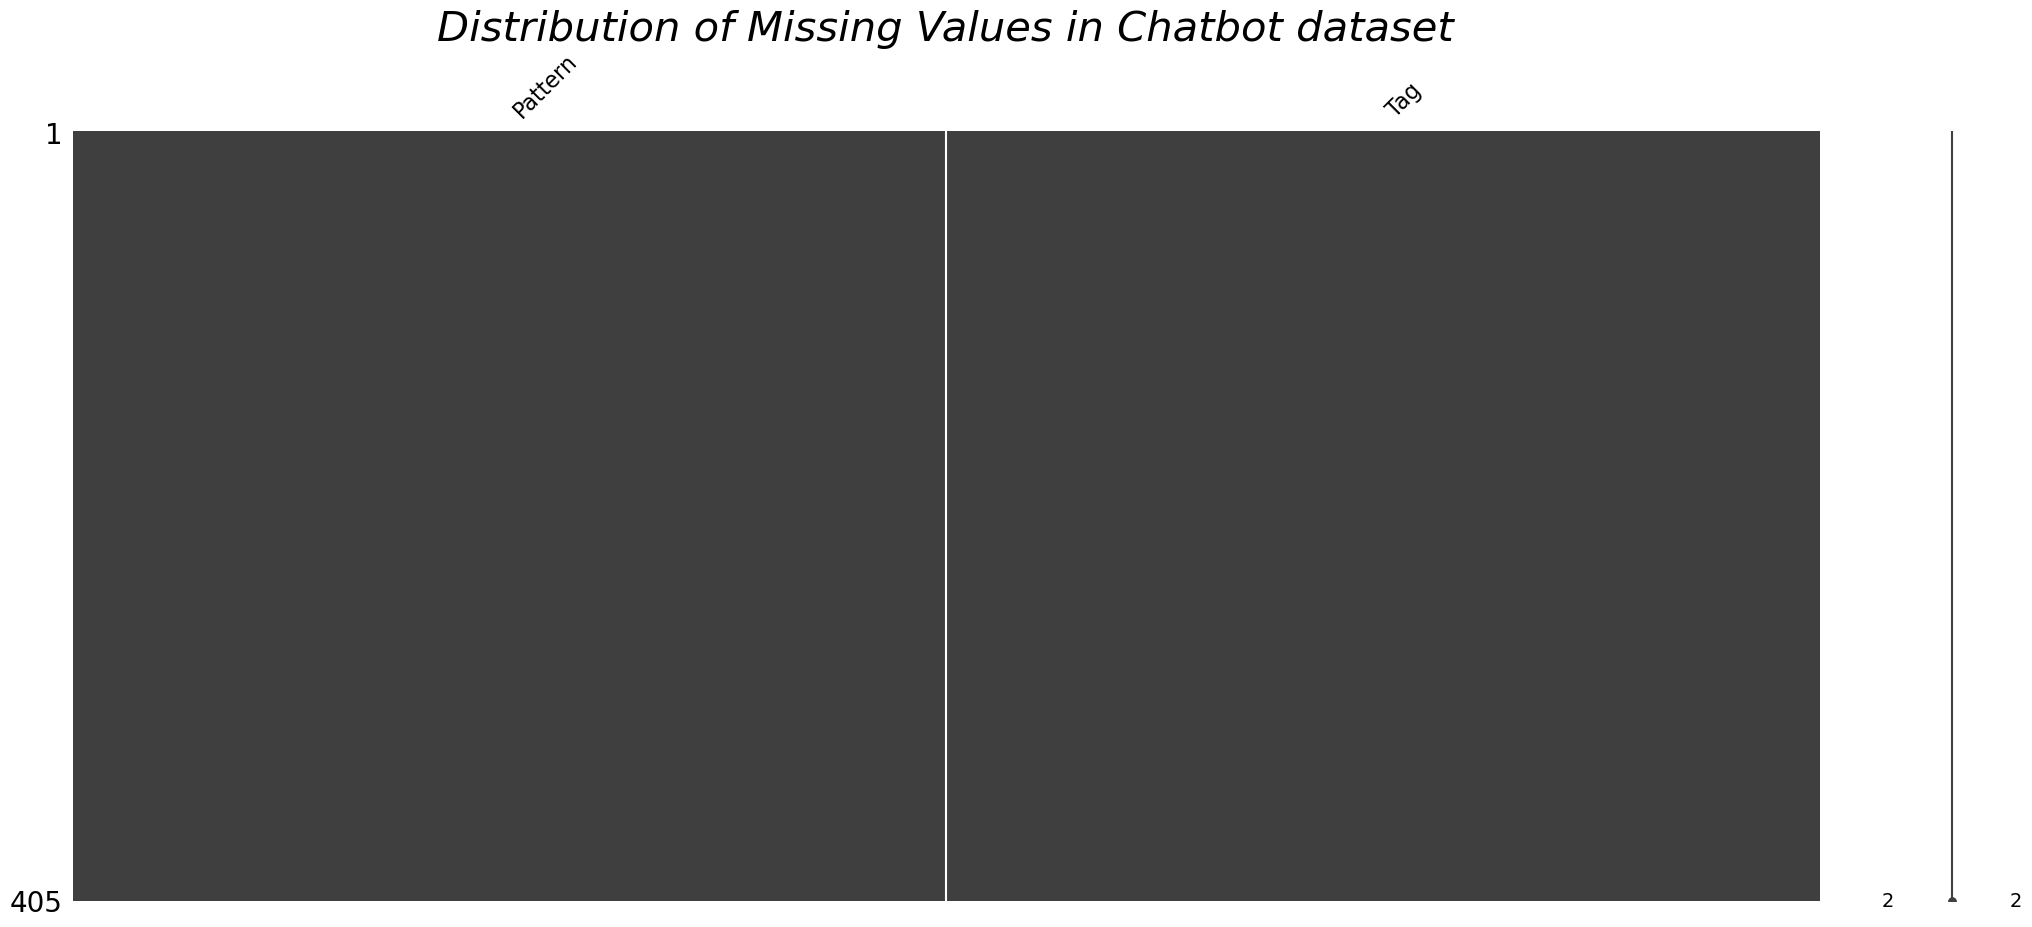

In [12]:
def plot_miss_vals(df, ds_name="df"):
    msno.matrix(df)
    plt.title(f'Distribution of Missing Values in {ds_name} dataset', fontsize=30, fontstyle='oblique')
    plt.show()
    
plot_miss_vals(df, "Chatbot")

<a id="3.8"></a>
### <b>3.8 <span style='color:#B21010'>||</span> Visualize the distrbution of our Classes</b>

In [13]:
def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)

    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    plt.show()

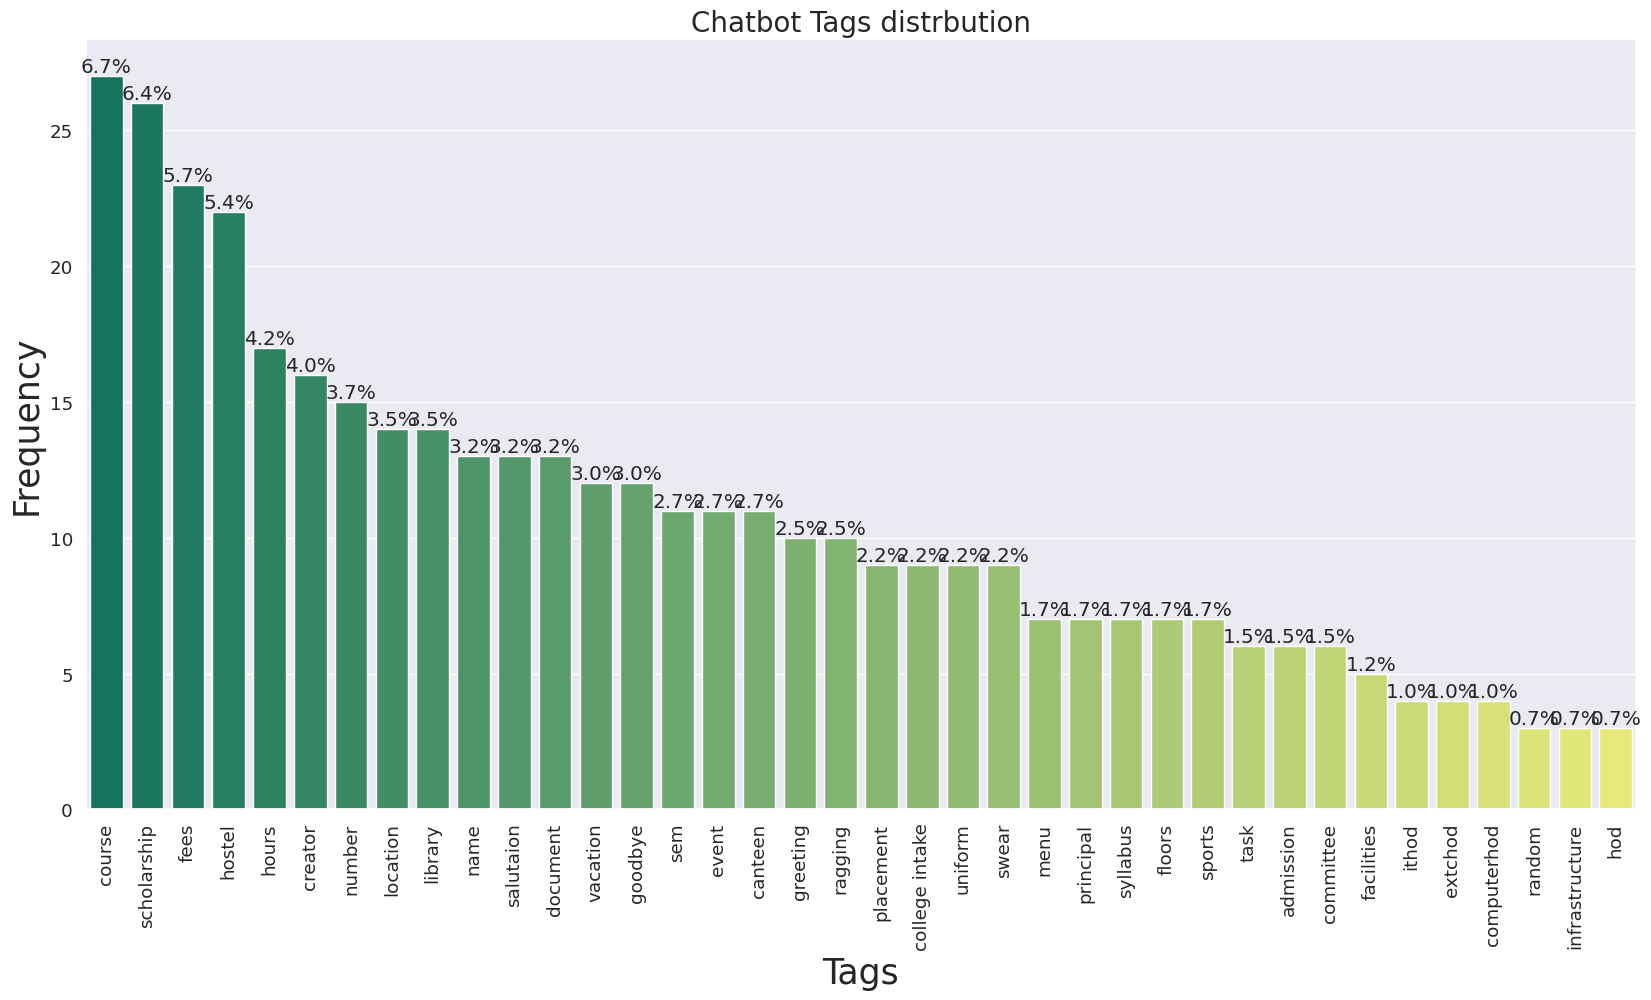

In [14]:
sns.set(font_scale = 1.2)
order = df['Tag'].value_counts().index
count_plot(df['Tag'], df, "Chatbot Tags distrbution", "Tags", "Frequency", 20,10, order=order,rotation=True, palette="summer")

In [15]:
stemmer = PorterStemmer()
ignore_words=['?', '!', ',', '.']

def preprocess_pattern(pattern):
    words = word_tokenize(pattern.lower())
    stemmed_words = [stemmer.stem(word) for word in words if word not in ignore_words]
    return " ".join(stemmed_words)  

df['Pattern'] = df['Pattern'].apply(preprocess_pattern)

In [16]:
df.head()

,Pattern,Tag
0,hi,greeting
1,how are you,greeting
2,is anyon there,greeting
3,hello,greeting
4,good day,greeting


In [17]:
print(df['Pattern'].isnull().sum())

0


<a id="3.9"></a>
### <b>3.9 <span style='color:#B21010'>||</span> Display Word Cloud</b>

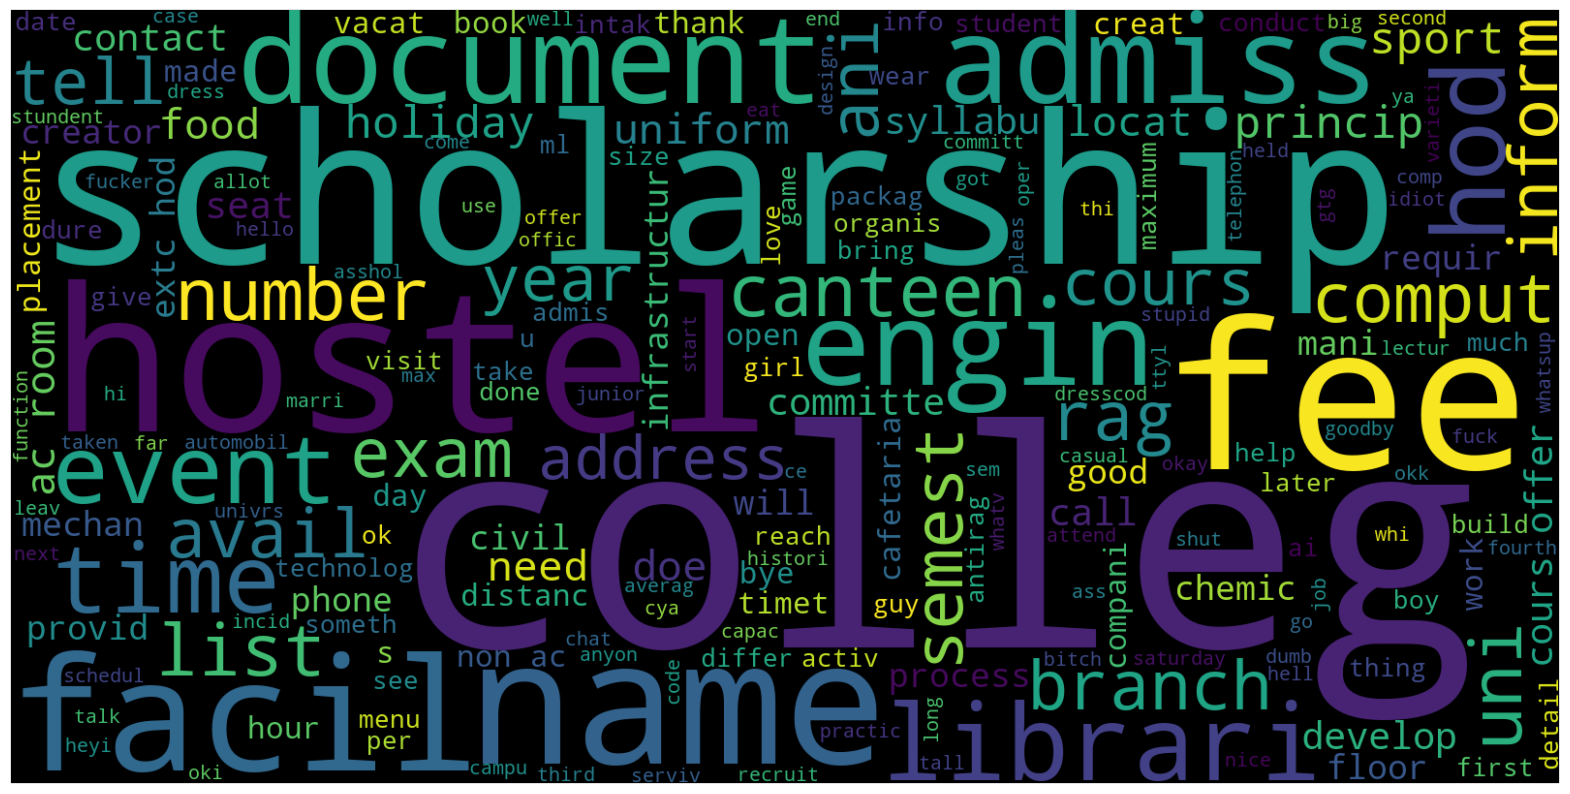

In [18]:
plt.figure(figsize=(20, 20)) 
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df['Pattern']))
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

<a id="3.10"></a>
### <b>3.10 <span style='color:#B21010'>||</span> Distrbution of Number of letters in each text</b>

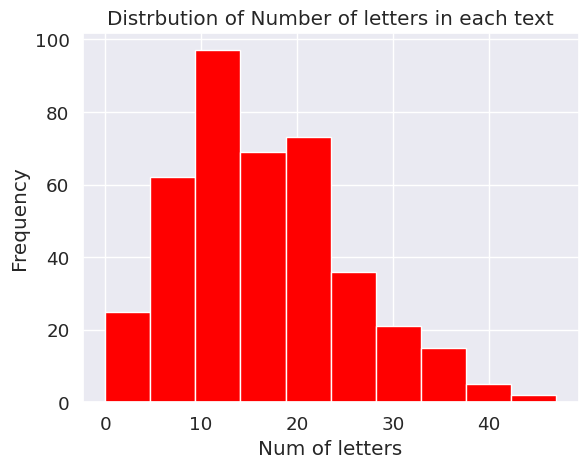

In [19]:
letters_len=df['Pattern'].str.len()
plt.hist(letters_len,color='red')
plt.title("Distrbution of Number of letters in each text")
plt.xlabel("Num of letters")
plt.ylabel("Frequency")
plt.show()

<a id="3.11"></a>
### <b>3.11 <span style='color:#B21010'>||</span> Distrbution of Number of words in each text</b>

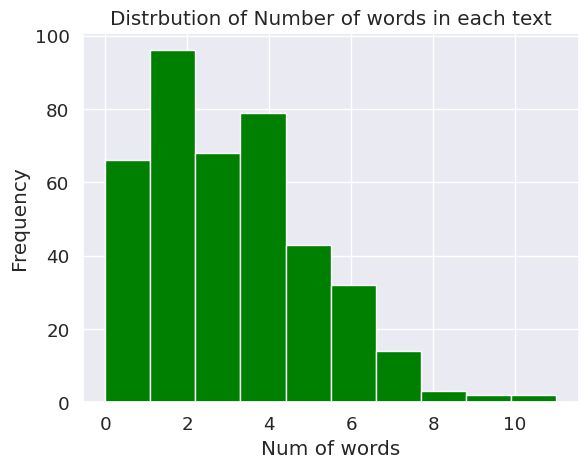

In [20]:
words_len=df['Pattern'].str.split().map(lambda x: len(x))
plt.hist(words_len,color='green')
plt.title("Distrbution of Number of words in each text")
plt.xlabel("Num of words")
plt.ylabel("Frequency")
plt.show()

<a id="3.12"></a>
### <b>3.12 <span style='color:#B21010'>||</span> Visualize Average word length in each text</b>

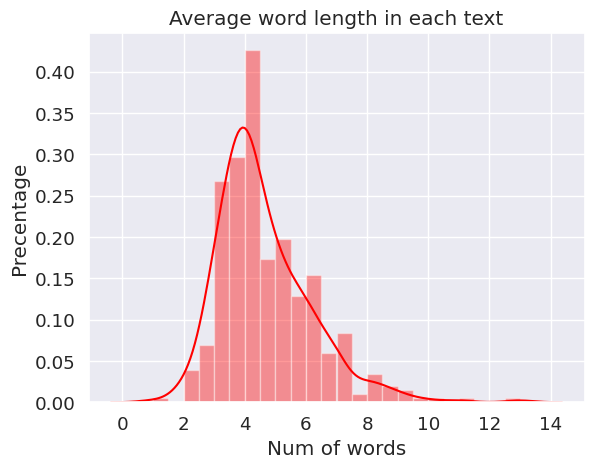

In [21]:
word=df['Pattern'].str.split().apply(lambda x : [len(i) for i in x])
word = word.map(lambda x: np.mean(x))
sns.distplot(word,color='red')
plt.title("Average word length in each text")
plt.xlabel("Num of words")
plt.ylabel("Precentage")
plt.show()

<a id="3.13"></a>
### <b>3.13 <span style='color:#B21010'>||</span> Visualize top words</b>

In [22]:
def get_corpus(series):
    words = []
    for text in series:
        for word in text.split():
            words.append(word.strip())
    return words

corpus = get_corpus(df.Pattern)
corpus[:5]

['hi', 'how', 'are', 'you', 'is']

In [23]:
print(f"dataset contains {len(corpus)} words")

dataset contains 1345 words


In [24]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'is': 75,
 'colleg': 71,
 'what': 59,
 'the': 46,
 'you': 35,
 'of': 33,
 'in': 29,
 'for': 26,
 'scholarship': 26,
 'are': 25}

In [25]:
def get_top_text_ngrams(corpus, n,g):
    vec = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

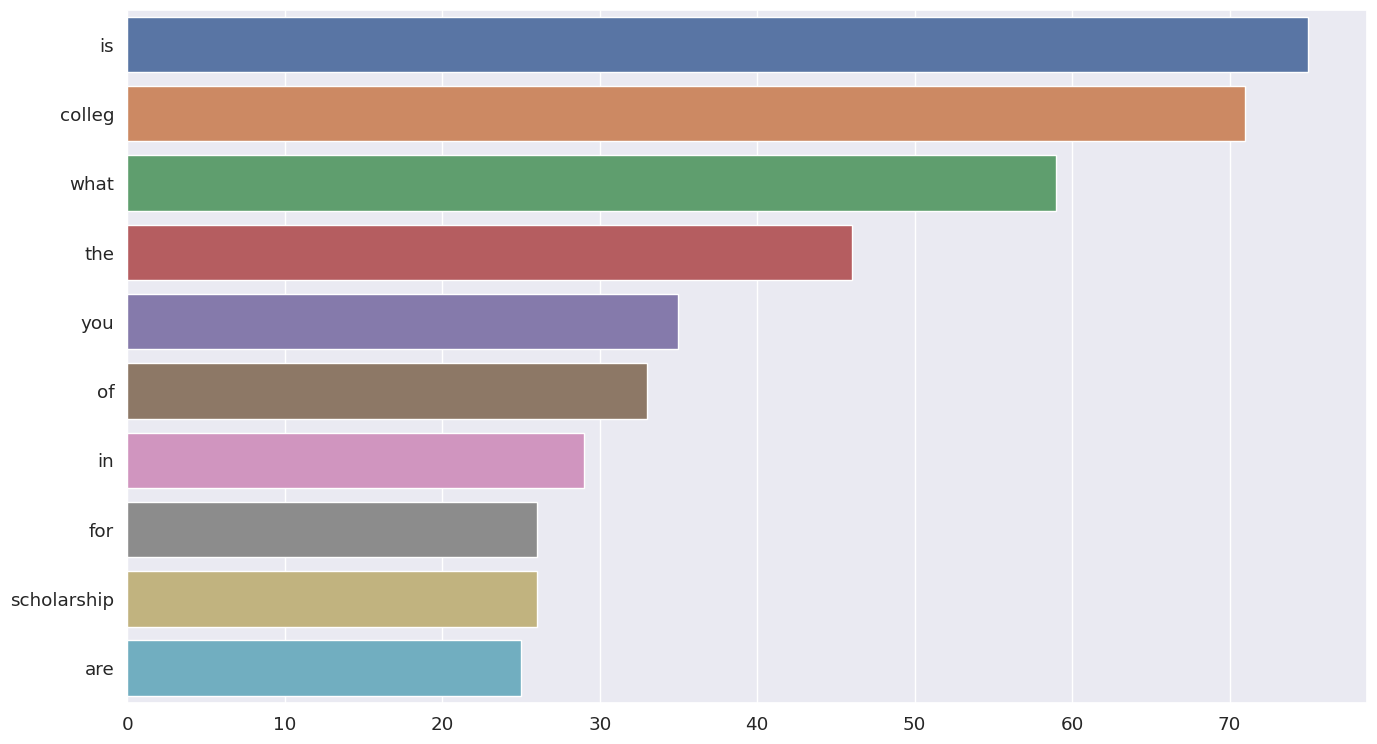

In [26]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.Pattern,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()));

<a id="4"></a>
## <b>4 <span style='color:#B21010'>||</span> Data Preprocessing</b>

In [27]:
df2.head()

,Pattern,Tag
0,Hi,greeting
1,How are you?,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Good day,greeting


In [28]:
labels = df2['Tag'].unique().tolist()
labels = [s.strip() for s in labels]
labels

['greeting',
 'goodbye',
 'creator',
 'name',
 'hours',
 'number',
 'course',
 'fees',
 'location',
 'hostel',
 'event',
 'document',
 'floors',
 'syllabus',
 'library',
 'infrastructure',
 'canteen',
 'menu',
 'placement',
 'ithod',
 'computerhod',
 'extchod',
 'principal',
 'sem',
 'admission',
 'scholarship',
 'facilities',
 'college intake',
 'uniform',
 'committee',
 'random',
 'swear',
 'vacation',
 'sports',
 'salutaion',
 'task',
 'ragging',
 'hod']

In [29]:
num_labels = len(labels)
id2label = {id:label for id, label in enumerate(labels)}
label2id = {label:id for id, label in enumerate(labels)}

In [30]:
id2label

{0: 'greeting',
 1: 'goodbye',
 2: 'creator',
 3: 'name',
 4: 'hours',
 5: 'number',
 6: 'course',
 7: 'fees',
 8: 'location',
 9: 'hostel',
 10: 'event',
 11: 'document',
 12: 'floors',
 13: 'syllabus',
 14: 'library',
 15: 'infrastructure',
 16: 'canteen',
 17: 'menu',
 18: 'placement',
 19: 'ithod',
 20: 'computerhod',
 21: 'extchod',
 22: 'principal',
 23: 'sem',
 24: 'admission',
 25: 'scholarship',
 26: 'facilities',
 27: 'college intake',
 28: 'uniform',
 29: 'committee',
 30: 'random',
 31: 'swear',
 32: 'vacation',
 33: 'sports',
 34: 'salutaion',
 35: 'task',
 36: 'ragging',
 37: 'hod'}

In [31]:
label2id

{'greeting': 0,
 'goodbye': 1,
 'creator': 2,
 'name': 3,
 'hours': 4,
 'number': 5,
 'course': 6,
 'fees': 7,
 'location': 8,
 'hostel': 9,
 'event': 10,
 'document': 11,
 'floors': 12,
 'syllabus': 13,
 'library': 14,
 'infrastructure': 15,
 'canteen': 16,
 'menu': 17,
 'placement': 18,
 'ithod': 19,
 'computerhod': 20,
 'extchod': 21,
 'principal': 22,
 'sem': 23,
 'admission': 24,
 'scholarship': 25,
 'facilities': 26,
 'college intake': 27,
 'uniform': 28,
 'committee': 29,
 'random': 30,
 'swear': 31,
 'vacation': 32,
 'sports': 33,
 'salutaion': 34,
 'task': 35,
 'ragging': 36,
 'hod': 37}

In [32]:
df2['labels'] = df2['Tag'].map(lambda x: label2id[x.strip()])
df2.head()

,Pattern,Tag,labels
0,Hi,greeting,0
1,How are you?,greeting,0
2,Is anyone there?,greeting,0
3,Hello,greeting,0
4,Good day,greeting,0


<a id="5"></a>
## <b>5 <span style='color:#B21010'>||</span> Split the data into train and test</b>

In [33]:
X = list(df2['Pattern'])
X[:5]

['Hi', 'How are you?', 'Is anyone there?', 'Hello', 'Good day']

In [34]:
y = list(df2['labels'])
y[:5]

[0, 0, 0, 0, 0]

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 123)

<a id="6"></a>
## <b>6 <span style='color:#B21010'>||</span> Load BERT Pretrained model and Tokenizer</b>

In [36]:
model_name = "bert-base-uncased"
max_len = 256

tokenizer = BertTokenizer.from_pretrained(model_name, 
                                          max_length=max_len)

model = BertForSequenceClassification.from_pretrained(model_name, 
                                                      num_labels=num_labels, 
                                                      id2label=id2label, 
                                                      label2id = label2id)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

<a id="7"></a>
## <b>7 <span style='color:#B21010'>||</span> Transform the data into numerical format</b>

In [37]:
train_encoding = tokenizer(X_train, truncation=True, padding=True)
test_encoding = tokenizer(X_test, truncation=True, padding=True)

In [38]:
full_data = tokenizer(X, truncation=True, padding=True)

<a id="8"></a>
## <b>8 <span style='color:#B21010'>||</span> Build Data Loader</b>


In [39]:
class DataLoader(Dataset):
    
    def __init__(self, encodings, labels):
        
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
               
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):

        return len(self.labels)

In [40]:
train_dataloader = DataLoader(train_encoding, y_train)
test_dataloader = DataLoader(test_encoding, y_test)

In [41]:
fullDataLoader = DataLoader(full_data, y_test)

<a id="9"></a>
## <b>9 <span style='color:#B21010'>||</span> Define Evaluation Metrcies</b>


In [42]:
def compute_metrics(pred):

    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

<a id="10"></a>
## <b>10 <span style='color:#B21010'>||</span> Define Training Arguments</b>


In [43]:
training_args = TrainingArguments(
    output_dir='./output', 
    do_train=True,
    do_eval=True,
    num_train_epochs=100,              
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=16,
    warmup_steps=100,                
    weight_decay=0.05,
    logging_strategy='steps',
    logging_dir='./multi-class-logs',            
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps", 
    load_best_model_at_end=True
)

<a id="11"></a>
## <b>11 <span style='color:#B21010'>||</span> Train the model</b>


In [44]:
trainer = Trainer(
    model=model,
    args=training_args,                 
    train_dataset=train_dataloader,         
    eval_dataset=test_dataloader,            
    compute_metrics= compute_metrics
)

In [45]:
trainer.train()

***** Running training *****
  Num examples = 303
  Num Epochs = 100
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 500
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,3.471800,3.143129,0.186275,0.053311,0.062376,0.119048
100,2.186400,1.633434,0.764706,0.674357,0.711688,0.683838
150,0.657900,0.631230,0.901961,0.915065,0.933180,0.921505
200,0.153400,0.515558,0.911765,0.917549,0.930108,0.933871
250,0.062800,0.483302,0.921569,0.927585,0.940860,0.940323
300,0.041900,0.494125,0.921569,0.927585,0.940860,0.940323
350,0.032800,0.504087,0.921569,0.927585,0.940860,0.940323
400,0.029000,0.506031,0.911765,0.912531,0.930108,0.932258
450,0.027400,0.510528,0.921569,0.927585,0.940860,0.940323
500,0.025500,0.511376,0.911765,0.912531,0.930108,0.932258


***** Running Evaluation *****
  Num examples = 102
  Batch size = 16
***** Running Evaluation *****
  Num examples = 102
  Batch size = 16
***** Running Evaluation *****
  Num examples = 102
  Batch size = 16
***** Running Evaluation *****
  Num examples = 102
  Batch size = 16
***** Running Evaluation *****
  Num examples = 102
  Batch size = 16
***** Running Evaluation *****
  Num examples = 102
  Batch size = 16
***** Running Evaluation *****
  Num examples = 102
  Batch size = 16
***** Running Evaluation *****
  Num examples = 102
  Batch size = 16
***** Running Evaluation *****
  Num examples = 102
  Batch size = 16
***** Running Evaluation *****
  Num examples = 102
  Batch size = 16
Saving model checkpoint to ./output/checkpoint-500
Configuration saved in ./output/checkpoint-500/config.json
Model weights saved in ./output/checkpoint-500/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./output/checkp

TrainOutput(global_step=500, training_loss=0.6688989984989167, metrics={'train_runtime': 200.2504, 'train_samples_per_second': 151.311, 'train_steps_per_second': 2.497, 'total_flos': 264789670748400.0, 'train_loss': 0.6688989984989167, 'epoch': 100.0})

<a id="12"></a>
## <b>12 <span style='color:#B21010'>||</span> Evaluate the model</b>


In [46]:
q=[trainer.evaluate(eval_dataset=df2) for df2 in [train_dataloader, test_dataloader]]

pd.DataFrame(q, index=["train","test"]).iloc[:,:5]

***** Running Evaluation *****
  Num examples = 303
  Batch size = 16


***** Running Evaluation *****
  Num examples = 102
  Batch size = 16


,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.020725,0.996700,0.998509,0.998747,0.998355
test,0.511376,0.911765,0.912531,0.930108,0.932258


In [47]:
def predict(text):
    
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to("cuda")
    outputs = model(**inputs)

    probs = outputs[0].softmax(1)
    pred_label_idx = probs.argmax()
    pred_label = model.config.id2label[pred_label_idx.item()]

    return probs, pred_label_idx, pred_label

In [48]:
text = "Hello"
predict(text)

(tensor([[9.8244e-01, 1.7053e-03, 5.8383e-04, 1.7352e-03, 4.1472e-05, 1.3136e-03,
          2.7841e-04, 3.8872e-05, 4.1097e-04, 4.9282e-04, 1.5271e-04, 8.1704e-04,
          9.1041e-05, 2.4114e-04, 6.1811e-04, 2.2477e-04, 2.4099e-04, 4.6582e-04,
          1.7602e-04, 7.3280e-04, 3.5741e-04, 2.8283e-04, 5.5288e-04, 2.6161e-04,
          6.3594e-04, 3.9910e-04, 8.2485e-04, 1.0642e-04, 2.8071e-04, 5.2068e-04,
          7.4093e-04, 2.2614e-04, 3.1444e-04, 1.8534e-04, 7.6034e-04, 1.3051e-04,
          3.7024e-04, 2.4863e-04]], device='cuda:0', grad_fn=<SoftmaxBackward0>),
 tensor(0, device='cuda:0'),
 'greeting')

<a id="13"></a>
## <b>13 <span style='color:#B21010'>||</span> Save the model</b>


In [49]:
model_path = "chatbot"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

Saving model checkpoint to chatbot
Configuration saved in chatbot/config.json
Model weights saved in chatbot/pytorch_model.bin
tokenizer config file saved in chatbot/tokenizer_config.json
Special tokens file saved in chatbot/special_tokens_map.json


('chatbot/tokenizer_config.json',
 'chatbot/special_tokens_map.json',
 'chatbot/vocab.txt',
 'chatbot/added_tokens.json')

In [50]:
#!pip install xformers

<a id="14"></a>
## <b>14 <span style='color:#B21010'>||</span> Load the model</b>


In [51]:
#

In [52]:
model_path = "/kaggle/working/chatbot"


model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer= BertTokenizerFast.from_pretrained(model_path)
#torch.jit._state.enable()
chatbot= pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

loading configuration file /kaggle/working/chatbot/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "greeting",
    "1": "goodbye",
    "2": "creator",
    "3": "name",
    "4": "hours",
    "5": "number",
    "6": "course",
    "7": "fees",
    "8": "location",
    "9": "hostel",
    "10": "event",
    "11": "document",
    "12": "floors",
    "13": "syllabus",
    "14": "library",
    "15": "infrastructure",
    "16": "canteen",
    "17": "menu",
    "18": "placement",
    "19": "ithod",
    "20": "computerhod",
    "21": "extchod",
    "22": "principal",
    "23": "sem",
    "24": "admission",
    "25": "scholarship",
    "26": "facilities",
    "27": "college intake",
    "28": "uniform",
  

In [53]:
chatbot("Hello")

[{'label': 'greeting', 'score': 0.9824399948120117}]

<a id="15"></a>
## <b>15 <span style='color:#B21010'>||</span> Chat with the Chatbot</b>


In [54]:
def chat(chatbot):
    
    print("Chatbot: Hi! I am your virtual assistance,Feel free to ask, and I'll do my best to provide you with answers and assistance..")
    print("Type 'quit' to exit the chat\n\n")
    
    text = input("User: ").strip().lower()
    
    while(text != 'quit'):

        score = chatbot(text)[0]['score']
        
        if score < 0.8:
            print("Chatbot: Sorry I can't answer that\n\n")
            text = input("User: ").strip().lower()
            continue
        
        label = label2id[chatbot(text)[0]['label']]
        response = random.choice(intents['intents'][label]['responses'])
        
        print(f"Chatbot: {response}\n\n")
            
        text = input("User: ").strip().lower()


In [56]:
chat(chatbot)

Chatbot: Hi! I am your virtual assistance,Feel free to ask, and I'll do my best to provide you with answers and assistance..
Type 'quit' to exit the chat




User:  uniform


Chatbot: ENTER YOUR OWN UNIVERSITY UNIFORM CIRCULER




User:  what is the school uniform


Chatbot: ENTER YOUR OWN UNIVERSITY UNIFORM CIRCULER




User:  hey


Chatbot: Hi there, how can I help?




User:  what is your creator


Chatbot: College students




User:  how were you made


Chatbot: Sorry I can't answer that




User:  how were you created


Chatbot: College students




User:  what are some of the different college facilities like in sports


Chatbot: Our university encourages all-round development of students and hence provides sports facilities in the campus. For more details visit<a target="_blank" href=/"(LINK IF HAVE)">here</a>




User:  what are some college facilities


Chatbot: Our university's Engineering department provides fully AC Lab with internet connection, smart classroom, Auditorium, library,canteen




User:  quit


<a id="16"></a>
## <b>16 <span style='color:#B21010'>||</span>Author Message</b>

<p style="background-color:#DEF5B9;font-family:newtimeroman;color:#1D3E06;font-size:130%;text-align:center;border-radius:20px 20px;"> If you liked this Notebook, please do upvote.<br> If you have any questions, feel free to comment!<br> If you have any advice for me I will be grateful to leave it to me in the comments!<br>✨Best Wishes✨</p>